# Set-up

In [86]:
%ls ../data/

UK_inflation.csv                     london_taxpayer_income.csv
UK_international-visits.csv          london_ticket_sales.csv
london_earnings_by_borough.csv       london_tickets_for_sale.csv
london_economic_activity.csv         london_underground_activity.csv
london_infrastructure_spending.csv   london_underground_station_info.csv
london_sports_participation.csv      museums.xlsx


## Import modules

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and preprocess data

In [88]:
international_visits = pd.read_csv('../data/UK_international-visits.csv', low_memory=False)

In [89]:
international_visits.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1
3,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTHERN ENGLAND,0.859430,0.044346,2.575960,1
4,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTH EAST,0.859430,0.044346,2.575960,1


In [90]:
international_visits.dtypes

year         object
quarter      object
market       object
dur_stay     object
mode         object
purpose      object
area         object
visits      float64
spend       float64
nights      float64
sample        int64
dtype: object

**Note:** 'year' has type `object`

In [91]:
international_visits['year'].unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019P'], dtype=object)

**Problem identified** instead of 2019 we have '2019P', which changed the dtype to 'object' while loading

**Important:** do not change dtype of year to `int`. That's why the next block is commented out.

In [92]:
# # replace '2019P' with 2019
# if '2019P' in set(international_visits['year'].unique()):
#     mapper = {'2019P': 2019}
#     international_visits['year'].replace(mapper, inplace=True)

In [127]:
international_visits.dtypes

year         object
quarter      object
market       object
dur_stay     object
mode         object
purpose      object
area         object
visits      float64
spend       float64
nights      float64
sample        int64
dtype: object

# EDA

In [138]:
categorical_vars = [col for col in international_visits.columns if international_visits[col].dtype == 'object']
categorical_vars

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']

In [139]:
print(categorical_vars)
international_visits.groupby('year').sum()

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']


,visits,spend,nights,sample
year,,,,
2002,92534.702940,42381.275741,7.726681e+05,147073
2003,95462.967278,42777.702442,7.907451e+05,141827
2004,105939.523706,46691.971786,8.710585e+05,152029
2005,114455.491151,51137.201557,9.589169e+05,161884
2006,123498.211576,57224.173651,1.050039e+06,161580
2007,124348.858777,56421.616456,9.653572e+05,144652
2008,122399.404486,58651.863174,9.562040e+05,128050
2009,113722.124843,59488.105800,8.826949e+05,169767
2010,113194.868762,59653.938918,8.664625e+05,169440


In [140]:
print(categorical_vars)
international_visits.groupby('quarter').sum().sort_values('spend', ascending=False)

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']


,visits,spend,nights,sample
quarter,,,,
July-September,678220.355513,388906.051560,6.139187e+06,764824
April-June,585351.506088,291707.400893,4.061855e+06,702203
October-December,481784.295356,256106.761199,3.539305e+06,580356
January-March,437261.701656,207449.691938,3.126961e+06,573902


**Observtion:** Most people come in 'July-September'

In [142]:
print(categorical_vars)
international_visits.groupby('market').sum().sort_values('spend', ascending=False)

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']


,visits,spend,nights,sample
market,,,,
USA,232880.908843,162210.833639,1.727816e+06,415488
Germany,209063.738013,79637.015368,1.250994e+06,215237
France,222737.134593,72849.406723,1.321742e+06,208544
Australia,79440.370529,58314.368891,9.168140e+05,151897
Spain,135187.336920,55764.557257,1.065575e+06,116245
...,...,...,...,...
Oman,1085.828287,1841.179429,2.002916e+04,1938
Indonesia,1422.026683,1811.816783,1.985068e+04,1886
Other Southern Africa,2202.018758,1811.769435,4.358350e+04,3886


In [143]:
print(categorical_vars)
international_visits.groupby('dur_stay').sum().sort_values('spend', ascending=False)

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']


,visits,spend,nights,sample
dur_stay,,,,
4-7 nights,669352.404839,331490.556460,3.353057e+06,780514
15+ nights,261540.355107,317910.197141,8.478795e+06,384717
1-3 nights,909005.916774,272254.591345,1.891040e+06,1004765
8-14 nights,335672.391284,218797.162545,3.120693e+06,450721
Not Known,7046.790610,3717.398099,2.372230e+04,568


In [144]:
print(categorical_vars)
international_visits.groupby('mode').sum().sort_values('spend', ascending=False)

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']


,visits,spend,nights,sample
mode,,,,
Air,1.614040e+06,974047.324841,1.362972e+07,2144023
Sea,3.459898e+05,95414.969007,2.061606e+06,269052
Tunnel,2.225880e+05,74707.611742,1.175985e+06,208210


In [145]:
print(categorical_vars)
international_visits.groupby('purpose').sum().sort_values('spend', ascending=False)

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']


,visits,spend,nights,sample
purpose,,,,
Holiday,763991.296691,405637.413675,4.729220e+06,877412
Business,516563.821650,284668.994733,2.294638e+06,622952
VFR,706202.711236,278104.332612,6.863810e+06,866022
Study,42625.240734,94602.392970,1.797451e+06,50327
Miscellaneous,153234.788302,81156.771600,1.182188e+06,204572


In [146]:
print(categorical_vars)
international_visits.groupby('area').sum().sort_values('spend', ascending=False)

['year', 'quarter', 'market', 'dur_stay', 'mode', 'purpose', 'area']


,visits,spend,nights,sample
area,,,,
ALL STAYING VISITS,541736.867936,318739.578549,4.390192e+06,646779
TOTAL ENGLAND,493900.666233,281443.606499,3.845357e+06,603370
LONDON,281743.968443,168521.346549,1.719220e+06,368100
REST OF ENGLAND,245056.923398,112922.259492,2.126138e+06,283992
SOUTHERN ENGLAND,112399.958512,49998.256300,9.093963e+05,139689
CENTRAL ENGLAND,85458.660421,32802.272753,6.639483e+05,92599
SOUTH EAST,79723.352459,32584.378733,5.821013e+05,98188
ENGLAND'S NORTH COUNTRY,68990.988248,29984.667805,5.501018e+05,80357
SCOTLAND,44643.781242,27115.772606,3.740345e+05,48882


In [157]:
international_visits_london_summer = international_visits[(international_visits['area'] == 'LONDON') & 
                                                          (international_visits['quarter'] == 'July-September') &
                                                          (international_visits['purpose'].isin(['Holiday', 'VFR', 'Miscellaneous']))]

In [158]:
df = international_visits_london_summer.groupby('year').sum()
df

,visits,spend,nights,sample
year,,,,
2002,2753.571458,1171.596415,20079.429417,4935
2003,2728.474433,1251.918780,20013.999345,4469
2004,3116.153085,1265.523401,24447.992019,4981
2005,2945.052610,1273.469342,23485.057793,4872
2006,3697.696133,1619.704871,27777.357370,5183
2007,3352.103006,1679.532043,22867.989625,4026
2008,3340.525796,1634.309072,24832.097599,3527
2009,3409.273295,1767.225191,23377.726551,4965
2010,3536.712107,1766.977554,24336.484820,5305


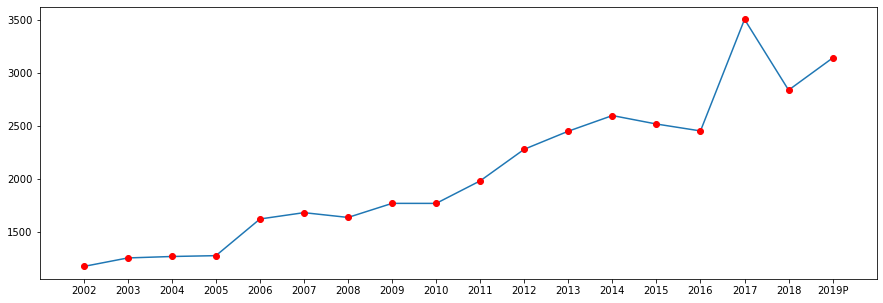

In [159]:
plt.figure(figsize=[15, 5])
plt.xlim([2001, 2020])

labels = list(df.index)
plt.xticks(np.arange(2002, 2020), labels)
plt.plot(np.arange(2002, 2020), df['spend'])
plt.plot(np.arange(2002, 2020), df['spend'], 'ro')
